In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
df = pd.read_csv("C://Users/gagan/Desktop/Python/ML/7.Regression/data.csv")

In [5]:
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [8]:
df.shape

(36, 5)

In [6]:
df1 = df.drop(columns=['Car','Model'])

In [7]:
df1

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105
5,1000,929,105
6,1400,1109,90
7,1500,1365,92
8,1500,1112,98
9,1600,1150,99


In [14]:
print(df1.corr())

          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


In [15]:
print(df.describe())

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


In [16]:
#emmision = β0 + (β1 Weight) + (β2 Volume) + e

In [15]:
X = df[['Weight', 'Volume']]
y = df['CO2']

C:\Users\gagan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


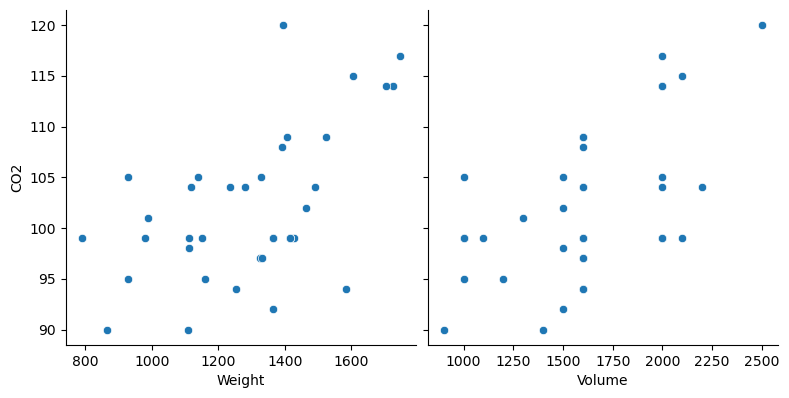

In [8]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

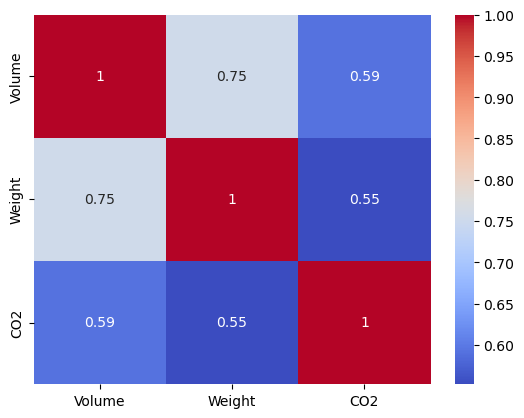

In [11]:
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Splitting the dataset into train and test set

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [17]:
y_train.shape

(25,)

In [18]:
y_test.shape

(11,)

In [19]:
reg_model = linear_model.LinearRegression()

In [20]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [21]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  88.58968472242279


[('Weight', -0.0043629762966177895), ('Volume', 0.011327170841824132)]

In [23]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [24]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [105.37416653 100.58317637 100.06834517  95.01016398 105.44999388
 107.92485091 105.01369625 100.53954661 103.80515182 104.74319172
 103.71789229]


In [29]:
reg_model.predict([[500,700]])

C:\Users\gagan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([94.33721616])

In [30]:
reg_model.predict([[2000,900]])

C:\Users\gagan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([90.05818589])

In [ ]:
mean_squared_error()